<a href="https://colab.research.google.com/github/GerardoMunoz/clasificador_simple/blob/main/clasificador_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento de la Red Neuronal Artificial (ANN) en Colab para identificar una sola etiqueta.

Si se ejecuta desde Colab hay que Subir un archivo 'image__s.zip' con las imágenes a clasificar en sus respectivos directorios. En este ejemplo tiene tres directorios. 
```
image__s
 - animal
 - flo__r
 - ot__r_
```

Sin embargo, sólo usaremos dos directorios.

A continuación se listan los archivos en el directorio actual

In [ ]:
!ls -l

total 10568
-rw-r--r-- 1 root root   573952 Mar 21 12:01 flo__r-animal.h5
drwxr-xr-x 5 root root     4096 Mar 21 11:47 image__s
-rw-r--r-- 1 root root 10232941 Mar 21 11:47 image__s.zip
drwxr-xr-x 1 root root     4096 Mar  9 14:48 sample_data


Revise que el archivo 'image__s.zip' haya subido bien, ya que archivos muy extensos no suben bien. Por eso es importante, antes de comprimir las imágenes, bajarles la resolución, por ejemplo a 124x124.

A continuación se descomprime el archivo de las imágenes. 

In [ ]:
from zipfile import ZipFile

with ZipFile('clasificador_simple/image__s.zip', 'r') as zipObj:
   zipObj.extractall()

In [ ]:
!ls 

flo__r-animal.h5  image__s  image__s.zip  sample_data


Se supones que dentro del directorio image__s hay dos carpetas: animal y flo__r

In [ ]:
!ls image__s  

animal	flo__r	ot__r_


In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import os

Se crea una lista con la ruta y el nombre de cada imagen

In [ ]:
etiqueta_a_clasificar = 'flo__r'

tres_caract_tipos = ('.jpg','.png')
etiquetas = ['ot__r_',etiqueta_a_clasificar]
X_data = []
Y_labels = []
Y_Encoded = []

camino = 'image__s/'
#carpetas = os.listdir(camino)
path = []
for i,etiqueta in  enumerate(etiquetas):#carpetas:
    for nombre_imagen in  os.listdir(camino + etiqueta):
        if nombre_imagen[-4:] in tres_caract_tipos:
            nombre_completo = camino + etiqueta + "/" + nombre_imagen
            #path.append(nombre_completo)
            #label = path[i].split("/")[-2]
            image = cv2.imread(nombre_completo)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (124,124))
            X_data.append(image)
            Y_labels.append(etiqueta)
            Y_Encoded.append(i)#[0]*i+[1]+[0]*(len(etiquetas)-i-1))

In [ ]:
type(path)

list

In [ ]:
len(path)

0

In [ ]:
#path[1]

In [ ]:
#path[1].split("/")

Se leen las imágenes y sus etiquetas

In [ ]:
# X_data = []
# Y_labels = []

# for i in range(0,len(path)):
#     label = path[i].split("/")[-2]
#     if label not in y_data:
#         continue #! otra opción es construir `path` sólo con los directorios de y_data
#     else:
#         image = cv2.imread(path[i])
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image = cv2.resize(image, (124,124))
#         X_data.append(image)
#         Y_labels.append(label)

In [ ]:
Y_labels[0]

'ot__r_'

In [ ]:
x_array = np.array(X_data)
y_array = np.array(Y_labels)
y_Encoded = np.array(Y_Encoded)

In [ ]:
x_array.shape

(198, 124, 124, 3)

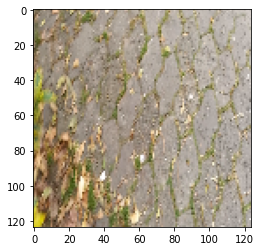

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_array[0])

In [ ]:
y_array.shape

(198,)

Asigna un número a cada etiqueta

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# LE = LabelEncoder()
# LE.fit(y_data)
# Y_Encoded = LE.transform(y_array)

In [ ]:
y_array

array(['ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_',
       'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__r_', 'ot__

In [ ]:
y_Encoded 
# 0: ot__r_
# 1: etiqueta_a_clasificar

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_Encoded.shape

(198,)

Se separa el 20% de las imágenes para realizar pruebas después de entrenar

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_array, y_Encoded, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((158, 124, 124, 3), (40, 124, 124, 3), (158,), (40,))

In [ ]:
np.min(x_train),  np.max(x_train)

(0, 255)

In [ ]:
x_train_norm = x_train/255. 
x_test_norm = x_test/255.

In [ ]:
np.min(x_train_norm),  np.max(x_train_norm)

(0.0, 1.0)

Se define el modelo de la red neuronal. En este caso es suficiente con un modelo sencillo, de una sola capa, ya que las imágenes a clasificar son fácilmente diferenciables.

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten()) #Convierte los datos de 2D a 1D 
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=4,
          batch_size=32)

Epoch 1/4
5/5 [==============================] - 2s 102ms/step - loss: 1.7870 - accuracy: 0.5380 - val_loss: 0.4762 - val_accuracy: 0.8000
Epoch 2/4
5/5 [==============================] - 0s 33ms/step - loss: 0.4901 - accuracy: 0.7595 - val_loss: 1.0185 - val_accuracy: 0.6250
Epoch 3/4
5/5 [==============================] - 0s 35ms/step - loss: 0.2878 - accuracy: 0.8671 - val_loss: 0.2434 - val_accuracy: 0.9250
Epoch 4/4
5/5 [==============================] - 0s 27ms/step - loss: 0.1345 - accuracy: 0.9430 - val_loss: 0.1451 - val_accuracy: 0.9500


En este caso se obtuvo una exactitud de validación (val_accuracy) superior al 0.8. Es decir que se clasificó bien más del 80% de las imágenes.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 46128)             0         
                                                                 
 dense (Dense)               (None, 1)                 46129     
                                                                 
Total params: 46,129
Trainable params: 46,129
Non-trainable params: 0
_________________________________________________________________


0.0

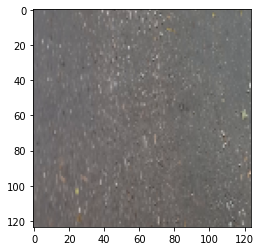

In [ ]:
x=x_test[0,...]
imgplot = plt.imshow(x)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
preds[0,0]
# 0: ot__r_
# 1: etiqueta_a_clasificar

Finalmente se almacenan en un archivo con extensión `.h5`, el cual contiene el modelo entrenado de la Red Neuronal. Esto con el fin de poderlo descargar y clasificar imágenes.

In [ ]:
model_name = 'clasifica_una_etiqueta.h5'
model.save(model_name, save_format='h5')

# Leer el modelo entrenado en una  RPI

A continuación, se muestra cómo se puede utilizar el modelo almacenado para clasificar imágenes.

1.0

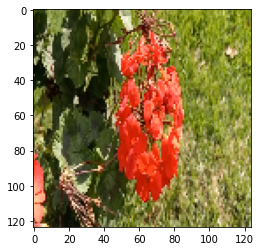

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

image = cv2.imread('image__s/flo__r/0001.png') # Si sale error, cambie el nombre por una imagen que sí exista
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (124,124))
imgplot = plt.imshow(image)
x = np.expand_dims(image, axis=0)
preds = loaded_model.predict(x)
preds[0,0]
# 0: ot__r_
# 1: etiqueta_a_clasificar

0.0

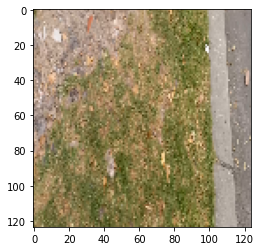

In [ ]:
image = cv2.imread('image__s/ot__r_/0126.png') # Si sale error, cambie el nombre por una imagen que sí exista
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (124,124))
imgplot = plt.imshow(image)
x = np.expand_dims(image, axis=0)
preds = loaded_model.predict(x)
preds[0,0]
# 0: ot__r_
# 1: etiqueta_a_clasificar